# Dynamical Power Spectra (on real data)

In [1]:
%matplotlib inline

In [2]:
# load auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# import stingray
import stingray

plt.style.use('seaborn-talk')

# All starts with a lightcurve..

Open the event file with astropy.io.fits

In [3]:
f = fits.open('emr_cleaned.fits')

The time resolution is stored in the header of the first extension under the Keyword `TIMEDEL`

In [4]:
dt = f[1].header['TIMEDEL']

The collumn `TIME` of the first extension stores the time of each event

In [5]:
toa = f[1].data['Time']

Let's create a Lightcurve from the Events time of arrival witha a given time resolution

In [6]:
lc = stingray.Lightcurve.make_lightcurve(toa=toa, dt=dt)

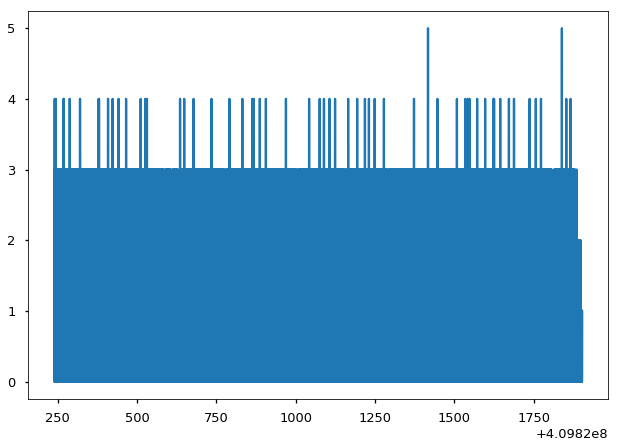

In [7]:
lc.plot()

---

# DynamicPowerspectrum

Let's create a dynamic powerspectrum with the a segment size of 16s and the powers with a "leahy" normalization

In [8]:
dynspec = stingray.DynamicalPowerspectrum(lc=lc, segment_size=16, norm='leahy')

The dyn_ps attribute stores the power matrix, each column corresponds to the powerspectrum of each segment of the light curve

In [9]:
dynspec.dyn_ps

array([[  2.01901704e+00,   2.32485459e+00,   5.14704363e+00, ...,
          9.76872866e-01,   9.49269045e-01,   4.60522187e+02],
       [  2.93960257e+00,   2.48892516e+00,   3.39280288e+00, ...,
          6.23511732e+00,   4.27550837e+00,   1.06261843e+02],
       [  3.64619904e+00,   1.58266627e+00,   3.42614944e-01, ...,
          1.16952148e+00,   3.54994270e+00,   4.56956463e+01],
       ..., 
       [  1.69311108e+00,   5.18784072e-01,   1.57151667e+00, ...,
          1.09923562e+00,   3.40274378e-01,   2.53108287e+00],
       [  2.95675687e-01,   2.47939959e+00,   2.84930818e+00, ...,
          2.99674579e-01,   1.48585951e+00,   7.49068264e+00],
       [  8.84156884e-01,   1.65514790e+00,   4.17385519e-01, ...,
          7.54942692e+00,   9.99801389e-01,   2.03835451e-01]])

To plot the DynamicalPowerspectrum matrix, we use the attributes `time`  and `freq` to set the extend of the image axis. have a look at the documentation of matplotlib's `imshow()`.

(700, 850)

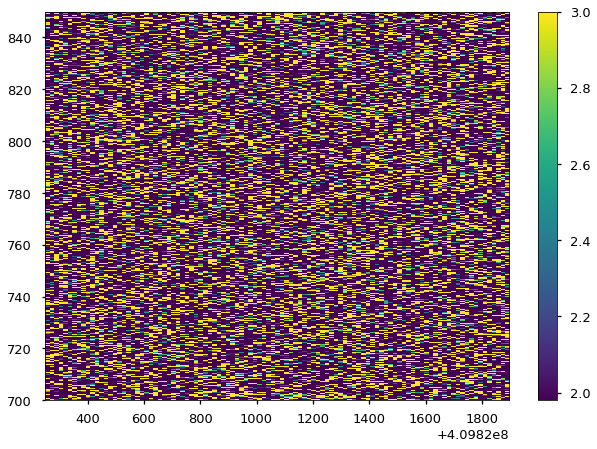

In [10]:
extent = min(dynspec.time), max(dynspec.time), max(dynspec.freq), min(dynspec.freq)

plt.imshow(dynspec.dyn_ps, origin="lower left", aspect="auto", vmin=1.98, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(700,850)

In [11]:
print("The dynamical powerspectrun has {} frequency bins and {} time bins".format(len(dynspec.freq), len(dynspec.time)))

The dynamical powerspectrun has 65535 frequency bins and 104 time bins


---

 # Rebinning in Frequency

In [12]:
print("The current frequency resolution is {}".format(dynspec.df))

The current frequency resolution is 0.0625


Let's rebin to a frequency resolution of 2 Hz and using the average of the power

In [13]:
dynspec.rebin_frequency(df_new=2.0, method="average")

In [14]:
print("The new frequency resolution is {}".format(dynspec.df))

The new frequency resolution is 2.0


Let's see how the Dynamical Powerspectrum looks now

(500, 1000)

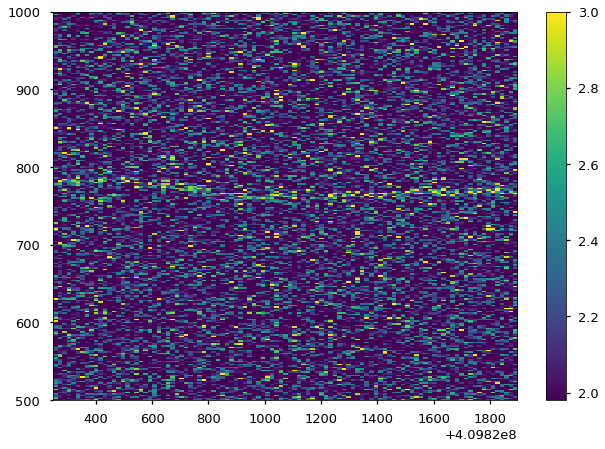

In [15]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=1.98, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(500, 1000)

(700, 850)

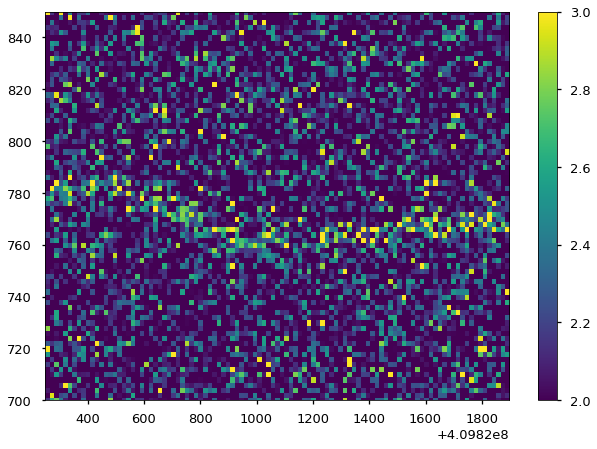

In [16]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(700,850)

# Rebin time

Let's try to improve the visualization by rebinnin our matrix in the time axis

In [17]:
print("The current time resolution is {}".format(dynspec.dt))

The current time resolution is 16.0


Let's rebin to a time resolution of 64 s

In [18]:
dynspec.rebin_time(dt_new=64.0, method="average")

In [19]:
print("The new time resolution is {}".format(dynspec.dt))

The new time resolution is 64.0


(700, 850)

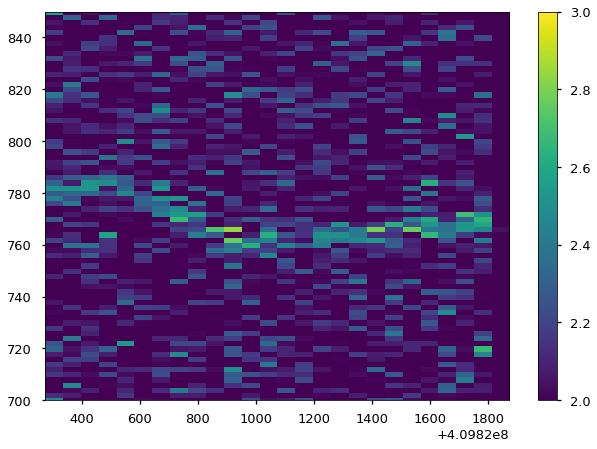

In [20]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(700,850)

# Trace maximun

Let's use the method `trace_maximum()` to find the index of the maximum on each powerspectrum in a certain frequency range. For example, between 755 and 782Hz)

In [21]:
tracing = dynspec.trace_maximum(min_freq=755, max_freq=782)

This is how the trace function looks like

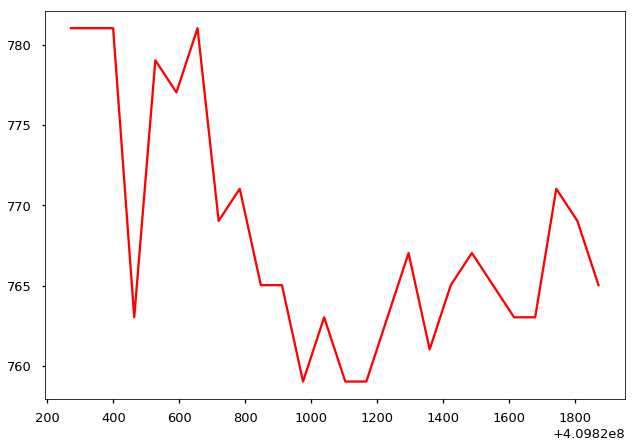

In [22]:
plt.plot(dynspec.time, dynspec.freq[tracing], color='red', alpha=1)
plt.show()

Let's plot it on top of the dynamic spectrum

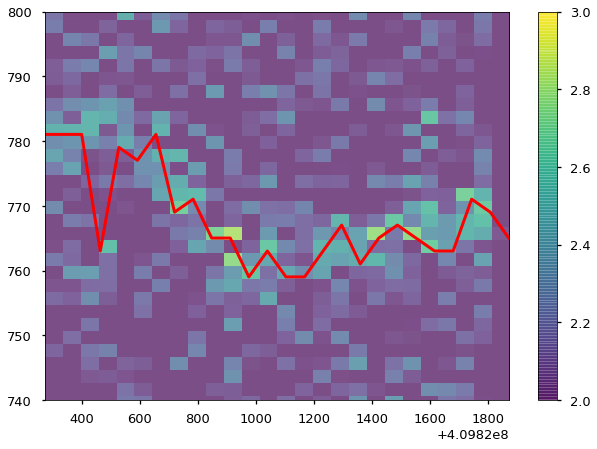

In [23]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent, alpha=0.7)
plt.colorbar()
plt.ylim(740,800)
plt.plot(dynspec.time, dynspec.freq[tracing], color='red', lw=3, alpha=1)
plt.show()

The spike at 400 Hz is probably a statistical fluctutations, tracing by the maximum power can be dangerous!

We will implement better methods in the future, stay tunned ;)